#  Heart Disease Dataset
sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
dataset ini saya ambil dari situs kaggle Kumpulan data ini berasal dari tahun 1988 dan terdiri dari empat database: Cleveland, Hungaria, Swiss, dan Long Beach V. Ini berisi 76 atribut, termasuk atribut yang diprediksi, tetapi semua percobaan yang dipublikasikan mengacu pada penggunaan subset dari 14 atribut tersebut :
1. age 'usia'
2. sex 'jenis kelamin'
3.  'jenis nyeri dada (4 nilai)'
4.  trestbps'tekanan darah'
5. chol 'Kolesterol serum dalam mg/dl'
6. fbs 'gula darah' 
7. restecg 'hasil elektrokardiografi atau ekologi jantung 
    (nilai 0,1,2)'
8. thalach 'detak jantung'
9. exang 'di induksi angina'
10. oldpea 'oldpeak = ST depresi yang diinduksi oleh penilaian     11. slope 'kestabilan terhadap jantung' 
12. ca 'penurunan detak ST dari penilain puncak'
13. thal: 0 = normal; 1 = terkena jantung; 2 = gagal jantung(kronis)

label "target" mengacu pada adanya penyakit jantung pada pasien. Itu adalah bilangan bulat bernilai 0 = tidak ada penyakit dan 1 = penyakit.


In [2]:
import pandas as pd
import numpy as np

# load data set

In [3]:
df = pd.read_csv('heart.csv')
df.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
73,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0


In [6]:
df = df.drop(['age'], axis=1)

In [7]:
df.sample()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
128,1,2,138,223,0,1,169,0,0.0,2,4,2,1


# pengecekan colums dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# Separate numerical and categorical columns
numerical = []
categorical = []
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        numerical.append(col)
    else:
        categorical.append(col)

# Fill missing values with median for numerical columns, mode for categorical columns
for col in numerical:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
numerical

['sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

Dari data kolum target terdapat 526 data terkena dan 499 data yang yang tidak terkena jumlah data yang ada ada 1025 peserta atau pasien

In [5]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [11]:
ind_col = [col for col in df.columns if col !='target' ]
dep_col = 'target'

In [12]:
df[dep_col].value_counts()

1    526
0    499
Name: target, dtype: int64

# transformasi Dataset

In [13]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [14]:
df.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.20, random_state=0)

# membuat model decetion Tree

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)
model = dtc.fit(x_train, y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()

print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.8426829268292683
akurasi data testing = 0.8682926829268293 

confusion matrix : 
[[86 12]
 [15 92]]

classification report : 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        98
           1       0.88      0.86      0.87       107

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



Setelah di lakukan simulasi dari dataset tersebut data set memiliki akurasi sekitar 87 % , dataset ini dapat di gunakan untuk membuat clasifikasi 

# simulasi model 

In [22]:
input_data = (1,0,125,212,0,1,168,0,1,2,2,3)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshape)
print(prediction)

if(prediction[0]==0):
    print ('pasien tidak terkena Penyakit Jantung')
else :
    print ('pasien terkena Penyakit Jantung')

[0]
pasien tidak terkena Penyakit Jantung


# visualisasi pohon keputusan 

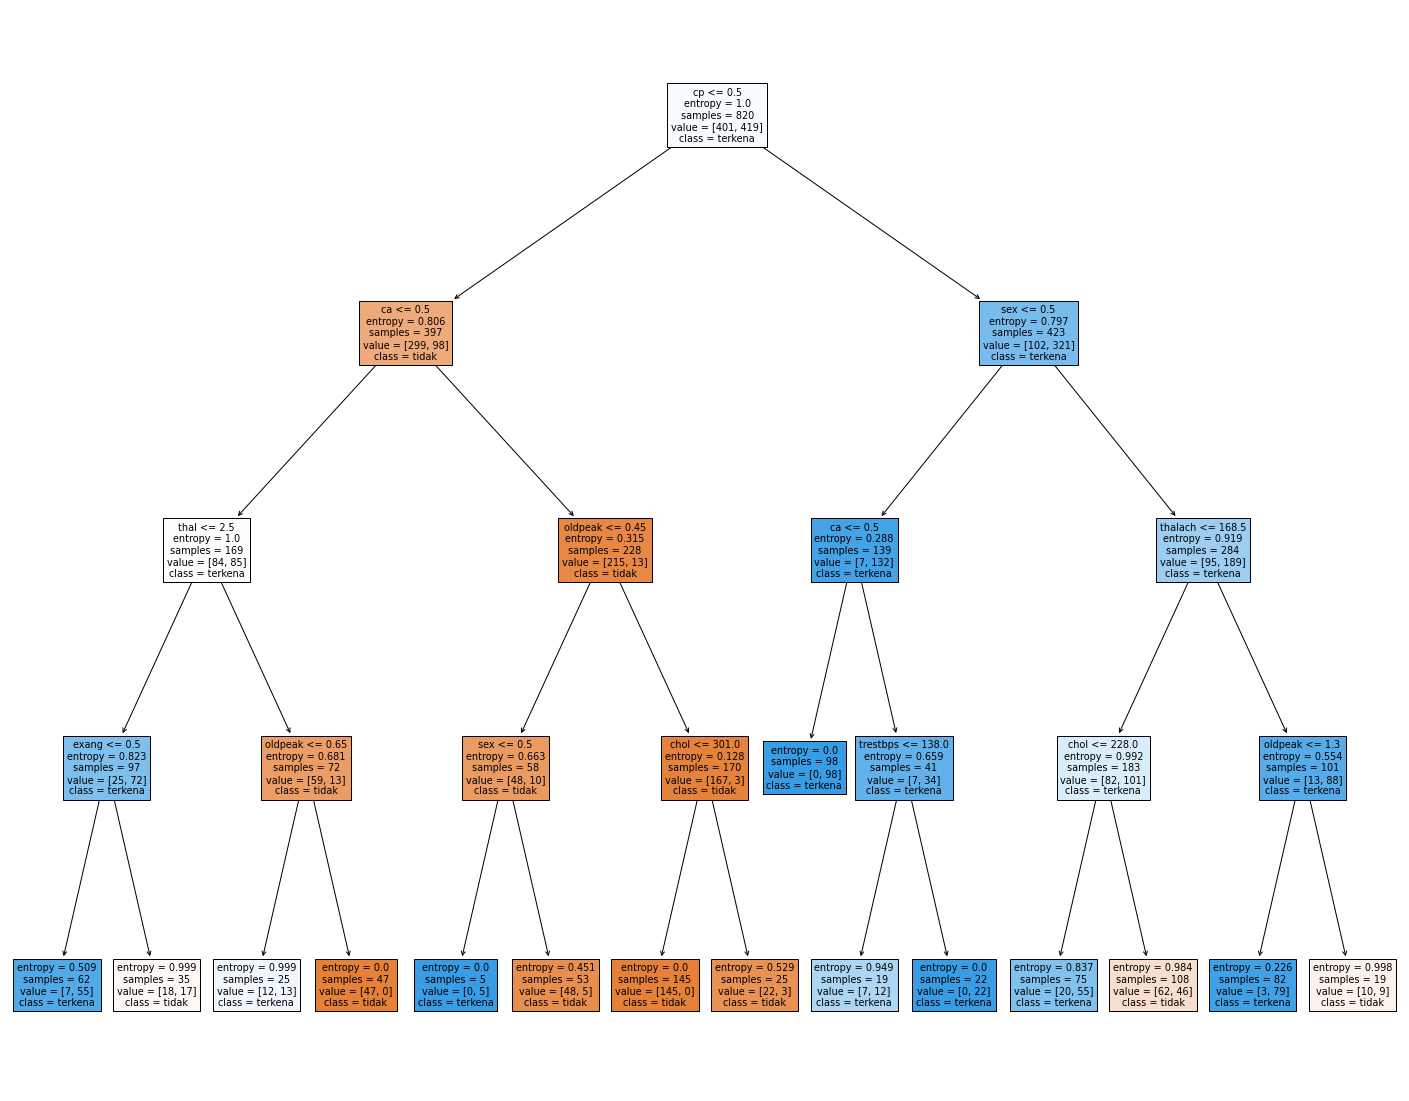

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                    feature_names=ind_col,
                    class_names=['tidak','terkena'],
                    filled=True)